The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

Customer ID: A unique identifier for each customer

Surname: The customer's surname or last name

Credit Score: A numerical value representing the customer's credit score

Geography: The country where the customer resides (France, Spain or Germany)

Gender: The customer's gender (Male or Female)

Age: The customer's age.

Tenure: The number of years the customer has been with the bank

Balance: The customer's account balance

NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

EstimatedSalary: The estimated salary of the customer

Exited: Whether the customer has churned (1 = yes, 0 = no)

The code for the STREAMLIT APP used and for the graphs that we have tried to analyse the data through which .

In [ ]:
# Import necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px

# Create a simple Streamlit app
def main():
    st.set_page_config(
        page_title="Dynamic Dashboard",
        page_icon="👋",
    )
    # Set the title of the app
    st.title("Welcome to home page!!")
    st.image("logo.png", caption="Streamlit Logo", use_column_width=True)


    # Create a sidebar with options
    option = st.sidebar.selectbox(
        'Select an option',
        ('Home', 'Data Exploration', 'About')
    )

    # Home Page
    if option == 'Home':
        st.write('Welcome to the Home Page!')

    # Data Exploration Page
    elif option == 'Data Exploration':
        st.subheader('Explore your data here:')
        uploaded_file = st.file_uploader("Please upload the csv file.", type="csv")

        if uploaded_file is not None:
            exp=st.sidebar.selectbox('Select the exploration method:',('Chart','Graph','Summary'))
            # Read the data from the uploaded CSV file
            df = pd.read_csv(uploaded_file)

            if exp == 'Chart':
                chart_type = st.selectbox("Select Chart Type:", ["Line Chart", "Scatter Plot", "Bar Chart"])

                x_column = st.selectbox("Select X Column:", df.columns)
                y_column = st.selectbox("Select Y Column:", df.columns)

                # Animator for animation_frame (useful for time-based data)
                animator_column = st.selectbox("Select Animator (Animation Frame):", [None] + df.columns.tolist())

                if animator_column:
                    # Sort DataFrame by the animator column
                    df_sorted = df.sort_values(by=animator_column)

                    # Create animated chart using Plotly Express
                    if chart_type == "Line Chart":
                        fig = px.line(df_sorted, x=x_column, y=y_column, animation_frame=animator_column,
                                    labels={x_column: x_column, y_column: y_column, 'animation_frame': animator_column})
                    elif chart_type == "Scatter Plot":
                        fig = px.scatter(df_sorted, x=x_column, y=y_column, animation_frame=animator_column,
                                        labels={x_column: x_column, y_column: y_column, 'animation_frame': animator_column})
                    elif chart_type == "Bar Chart":
                        fig = px.bar(df_sorted, x=x_column, y=y_column, animation_frame=animator_column,
                                    labels={x_column: x_column, y_column: y_column, 'animation_frame': animator_column})
                else:
                    # Create non-animated chart
                    if chart_type == "Line Chart":
                        fig = px.line(df, x=x_column, y=y_column, labels={x_column: x_column, y_column: y_column})
                    elif chart_type == "Scatter Plot":
                        fig = px.scatter(df, x=x_column, y=y_column, labels={x_column: x_column, y_column: y_column})
                    elif chart_type == "Bar Chart":
                        fig = px.bar(df, x=x_column, y=y_column, labels={x_column: x_column, y_column: y_column})

                # Show the chart in Streamlit
                st.plotly_chart(fig)

            elif exp=='Graph':
                Graph_type = st.selectbox("Select Chart Type:", ["Bar Graph", "Violin Plot", "Bubble Plot"])

                x_column = st.selectbox("Select X Column:", df.columns)
                y_column = st.selectbox("Select Y Column:", df.columns)

                # Animator for animation_frame (useful for time-based data)
                animator_column = st.selectbox("Select Animator (Animation Frame):", df.columns.tolist())
                df_sorted = df.sort_values(by=animator_column)

                if Graph_type == "Bar Graph":
                    # Create a moving bar graph based on user-selected axes and animator
                    fig = px.bar(df_sorted, x=x_column, y=y_column, color=x_column,
                                                animation_frame=animator_column,
                                                title=f"Moving Bar Graph: {y_column} by {x_column} (Animated by {animator_column})",
                                                labels={x_column: x_column, y_column: y_column, animator_column: animator_column})

                    # Show the moving bar graph in Streamlit
                    st.plotly_chart(fig)

                elif Graph_type == 'Violin Plot':
                    # Create animated violin plot
                    fig= px.violin(df_sorted, x=x_column, y=y_column,
                                                    animation_frame=animator_column,
                                                    title=f'Violin Plot of {y_column} for Different {x_column}s (Animated by {animator_column})',
                                                    labels={x_column: x_column, y_column: y_column})

                    # Show the animated violin plot in Streamlit
                    st.plotly_chart(fig)


                elif Graph_type == 'Bubble Plot':

                    # Creating the animated bubble plot
                    fig = px.scatter(df_sorted, x=x_column, y=y_column,
                                    animation_frame=animator_column,
                                    title=f"{x_column} vs {y_column} (Animated by {animator_column})",
                                    labels={x_column: x_column, y_column: y_column},
                                    log_x=False)

                    # Updating layout with play/pause buttons
                    fig.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                                        buttons=[dict(label='Play',
                                                                    method='animate',
                                                                    args=[None, dict(frame=dict(duration=1000, redraw=True),
                                                                                    fromcurrent=True)]),
                                                                dict(label='Pause',
                                                                    method='animate',
                                                                    args=[[None], dict(frame=dict(duration=300, redraw=True),
                                                                                        mode='immediate',
                                                                                        transition=dict(duration=100))])])],
                                    xaxis_title=x_column, yaxis_title=y_column,
                                    xaxis=dict(type='linear'), height=600)

                    # Show the animated bubble plot in Streamlit
                    st.plotly_chart(fig)

            elif exp=='Summary':
              st.dataframe(df)
              # Display summary statistics
              st.write('Summary Statistics:')
              st.write(df.describe())

    # About Page
    elif option == 'About':
        st.write('This is a simple Streamlit app created as an example.')

# Run the app
if __name__ == "__main__":
    main()

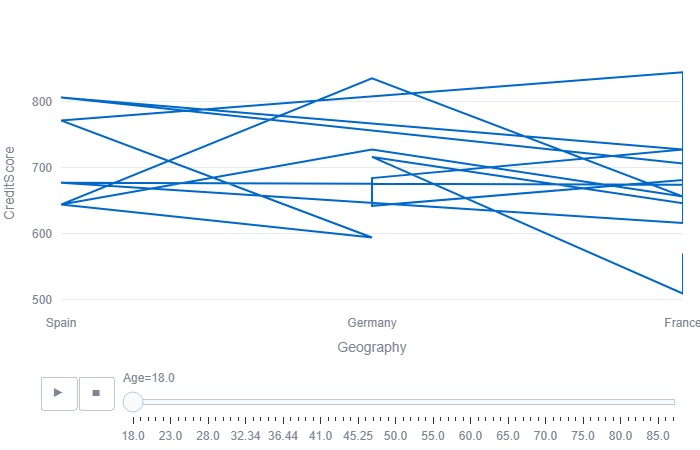

**objectives **
Distribution of credit scores within each country:
Look for patterns in central tendencies (e.g., mean, median) and spread (e.g., range, standard deviation) to identify differences between countries.
Note any outliers or unusual clusters that might warrant further investigation.

Overlap or separation between countries:
Assess the degree of overlap in credit scores between countries.
Consider the implications of distinct or overlapping distributions for targeted marketing or risk assessment strategies.

Potential trends or relationships:
Look for trends or patterns in how credit scores relate to geography.
Explore factors that might explain observed differences (e.g., economic conditions, cultural norms, credit policies).

**General observations:**

The graph shows the average credit score for customers in three countries: Spain, France, and Germany.

Germany has the highest average credit score, followed by France and then Spain.
There is some overlap in the credit score ranges between the three countries, but the distributions are also separated to some extent.

**Distribution of credit scores:**

Germany: The credit scores in Germany are tightly clustered around the mean, with very few outliers. This suggests that there is a relatively high degree of financial stability and homogeneity among borrowers in Germany.

France: The credit scores in France are more spread out than in Germany, with a wider range and more outliers. This suggests that there is greater financial diversity among borrowers in France, with both high- and low-scoring individuals.

Spain: The credit scores in Spain are similar to France in terms of spread and range, but with a slightly lower average score. This suggests that there is a mix of financial stability and risk in Spain, with a somewhat higher proportion of borrowers with lower credit scores compared to Germany.

**Potential trends and relationships:**

There is a weak positive correlation between geography and credit score, with Germany having the highest average score and Spain having the lowest. This could be due to a variety of factors, such as economic conditions, cultural norms, or differences in credit reporting and lending practices.

**Managerial implications:**

Targeted marketing and customer segmentation:
Banks could use the information in this graph to target their marketing and product offerings to specific geographic markets. For example, they might offer higher-interest savings accounts to customers in Germany, where there is a higher concentration of high-scoring borrowers.

They could also segment their customer base based on credit score and geography to develop more tailored marketing campaigns and product recommendations.

Risk assessment and credit decision-making:
Banks could take into account geographic factors when assessing the creditworthiness of loan applicants. For example, they might require a higher credit score for borrowers in Spain compared to Germany, due to the slightly higher risk profile in Spain.

They could also develop differentiated credit policies or risk models for different geographic markets.

Customer understanding and engagement:
Banks could use the insights from this graph to better understand their customers in different geographic markets. For example, they might find that customers in Spain are more likely to need help managing their debt, while customers in Germany are more interested in investment products.

They could develop targeted financial education and engagement programs based on these insights.

**Limitations:**

It is important to note that this graph is based on a limited sample of data and may not be representative of the entire population of borrowers in each country.
There could be other factors that are not captured in the graph that could explain the differences in credit scores between countries

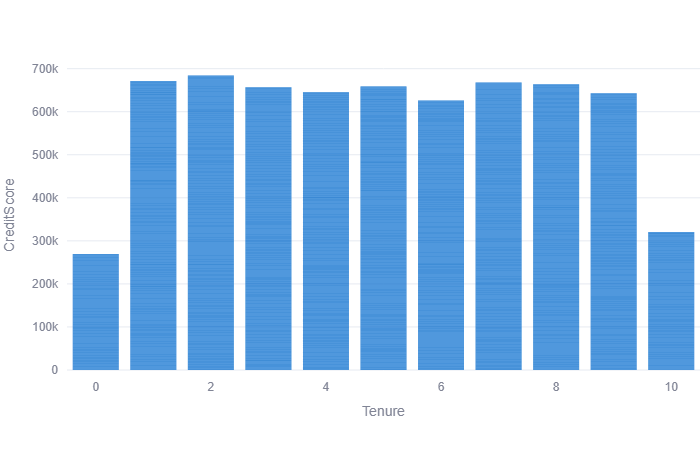

**Objectives:**


Visualize the relationship between credit score and customer tenure: The graph aims to show how credit scores change as customers accumulate tenure (time spent with the bank).

Identify trends or patterns in credit scores based on tenure length: This involves understanding whether credit scores generally increase, decrease, or remain stable with increasing tenure.

Explore potential managerial implications for customer retention, risk assessment, and product strategies: The analysis should inform strategies to retain valuable customers, manage credit risk effectively, and tailor product offerings to different customer segments.

**Analysis:**

**Overall trend:** The graph shows a positive correlation between credit score and tenure. As customers spend more time with the bank, their credit scores tend to increase.

**Variability:** The spread of credit scores increases with tenure. While longer tenure generally leads to higher scores, there's also a wider range of scores within each tenure group. This suggests that other factors beyond tenure influence credit scores.

**Outliers:** There are a few data points with significantly lower credit scores than the trend suggests for their tenure. These outliers could represent individuals with financial challenges or specific circumstances impacting their creditworthiness.

**Shape of relationship:** The relationship appears to be non-linear. The rate of credit score increase seems to slow down with longer tenure, suggesting diminishing returns over time.

**Interpretation:**

Factors influencing credit score and tenure: Several factors could contribute to the observed trend. Longer tenure may indicate responsible financial behavior, leading to improved credit scores.

 Additionally, the bank might offer better financial products or services to long-term customers, further boosting their creditworthiness.

Implications for customer segmentation: Combining credit score and tenure data can create valuable customer segments. For example, high-scoring customers with long tenure might be categorized as "loyal high-value," while those with lower scores and shorter tenure could be identified as "at-risk."

**Managerial Implications:**

Customer retention: Focus on retaining high-scoring, long-tenured customers through loyalty programs, personalized offers, and premium services.

**Risk assessment:*** Consider tenure as a factor in credit risk models, with longer tenure potentially indicating lower risk. However, avoid relying solely on tenure and incorporate other relevant creditworthiness indicators.

**Product strategies:** Develop targeted product offerings for different customer segments. For example, offer low-risk investment products to high-scoring, long-tenured customers, while providing credit-building solutions or financial education resources to customers with lower scores or shorter tenure.

**Early intervention:** Identify customers with declining credit scores early in their tenure to understand the reasons and offer support to prevent churn or creditworthiness issues.

**Personalized marketing:** Tailor marketing messages and promotions based on credit score and tenure. For instance, target long-tenured customers with exclusive deals or upgrades, while offering educational resources or credit repair assistance to customers with lower scores.

Overall, the graph reveals valuable insights into the relationship between credit score and tenure. By understanding the trends and potential influencing factors, banks can develop more effective strategies for customer retention, risk management, and product development.

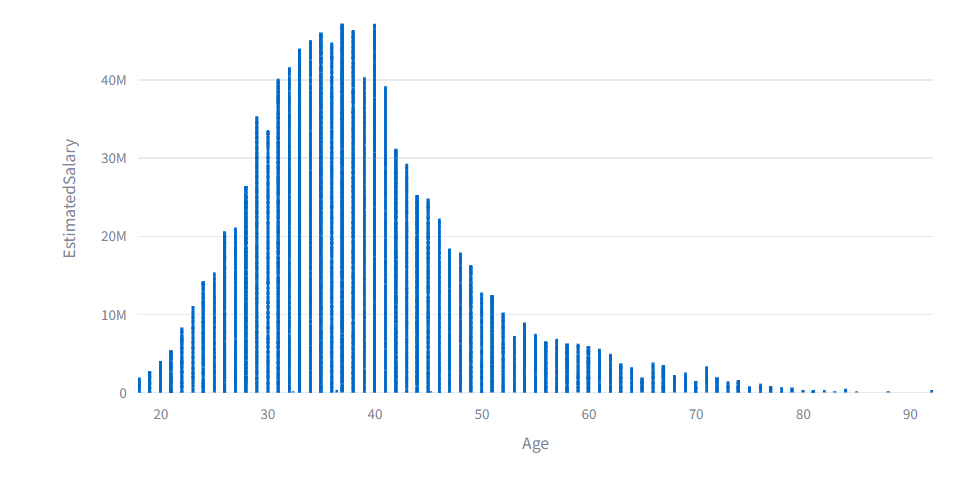

**objectives:**

Visualize the relationship between estimated salary and employee age: The graph aims to show how salaries change as employees progress through different age groups.

Identify trends or patterns in salary based on age: This involves understanding whether salaries generally increase, decrease, or remain stable with increasing age.

Explore potential managerial implications for compensation strategies, talent retention, and workforce planning: The analysis should inform decisions about salary structures, employee retention efforts, and workforce development initiatives.

**Analysis:**

**Overall trend:** The graph shows a positive correlation between estimated salary and age. As employees get older, their estimated salaries tend to increase.

**Shape of relationship:** The relationship appears to be non-linear. The rate of salary increase seems to be steeper in the early to middle stages of careers, potentially plateauing or slowing down in later years.

**Variability:** There's variability in salaries within each age group, suggesting that other factors beyond age influence earnings, such as job title, experience, skills, and industry.

**Outliers:** Identify any data points that deviate significantly from the overall trend, potentially representing individuals with exceptional performance or unique career paths.

**Interpretation:**

Factors influencing salary and age: Several factors likely contribute to the observed trend:

**Experience and expertise:** Older employees often have more experience, expertise, and potentially higher levels of responsibility, leading to higher compensation.

**Career progression:** Individuals typically move into higher-paying roles as they advance in their careers, which often correlates with age.

**Industry norms:** Salary expectations and pay structures can vary by industry, influencing salary trends across age groups.

**Managerial Implications:**

***Compensation strategies:***
Ensure salary structures align with the observed age-salary relationship to maintain competitiveness and fairness.

Regularly review and adjust salary ranges based on market trends and internal equity considerations.

Consider factors beyond age, such as performance, skill level, and potential, when determining individual salaries.

Talent retention:
Focus on retaining high-performing employees in mid-career stages where salary growth is often significant.

Offer competitive compensation packages and opportunities for career advancement to prevent turnover of experienced professionals.

Workforce planning:
Anticipate salary increases as employees age and factor this into budget projections and recruitment strategies.

Develop succession plans to ensure knowledge transfer and replace retiring senior employees with adequately compensated talent.

Offer training and development opportunities to help employees maintain their market value and contribute to their salary growth potential.

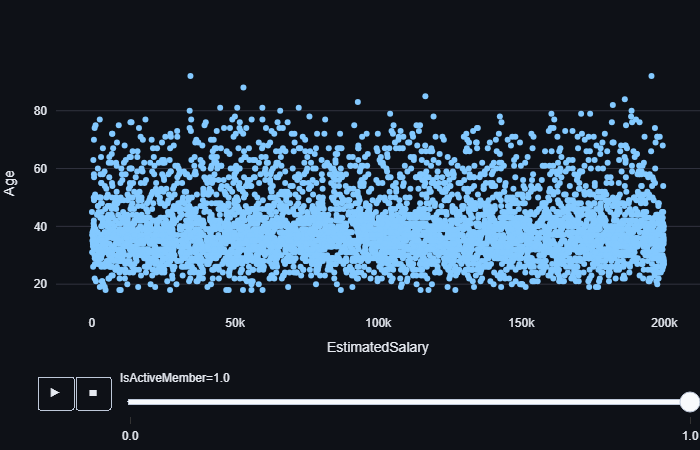

**Objective**
This animated bar graph aims to visualize the relationship between estimated salary and customer age, segmented by their active member status (1 = yes, 0 = no). It allows for analyzing how age distribution among different salary levels evolves based on their active membership in the bank.

Insights Analysis

**Key observations:**


General Trend: There appears to be a positive correlation between estimated salary and age across both active and inactive members. This suggests that customers with higher estimated salaries tend to be older on average.

**Active Member Segments:**

**Active Members:** The distribution of ages appears wider for higher salary ranges, indicating greater variability in age among high-earning active members. This could suggest factors like career progression or early wealth accumulation leading to higher income and continued active membership at younger ages.

**Inactive Members:** The distribution of ages might be more concentrated for all salary ranges, suggesting less variation in age compared to active members. This could point towards reasons like retirement or life stage changes leading to decreased engagement with the bank across various age groups.

**Dynamic Changes:** Observing the animation could reveal how the age distribution within each salary range and 'IsActiveMember' segment changes over time. This might show trends like younger generations entering the high-income bracket or shifts in member retention patterns across different salary levels.

**Potential explanations:**

Higher income individuals might accumulate wealth and assets over time, leading to later retirement and longer active membership.

Younger generations might enter the workforce with higher estimated salaries due to changing economic and market conditions, impacting the age distribution within higher income brackets.

Bank offers and benefits tailored to higher-earning individuals might attract and retain them as active members for longer, contributing to the observed pattern.

**Managerial Implications**

Based on these insights, here are some potential actions for the bank:

Targeted marketing for active members: Focus outreach efforts on younger, high-earning individuals to convert them into active members and leverage their potential future loyalty. Consider leveraging social media or digital marketing channels to reach younger demographics effectively.

Retention strategies for high-earning customers: Provide exclusive benefits, financial planning services, or investment opportunities to retain high-earning active members and prevent churn. Consider personalized offerings based on age and life stage to cater to their evolving needs.

Segment-specific product development: Develop products and services tailored to the needs and preferences of different age groups and income levels within both active and inactive segments. For example, consider offering mobile banking solutions for younger generations or wealth management services for high-net-worth individuals.

Data-driven customer engagement: Utilize customer data and insights to personalize communication and engagement strategies, enhancing member satisfaction and loyalty.

Analyze engagement patterns across different segments and tailor communication channels and content accordingly.

Investigate reasons for inactivity: Understanding why customers become inactive, especially within particular age groups, can help address specific concerns and develop targeted reactivation strategies.